# APPENDIX A

# Player Value Predictor

## Preparation

### Imports and Data Load

Here, I'll be importing libraries and loading the file.

In [ ]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/UT/Plan\ II\ \(General\)/Thesis/Model

/content/gdrive/MyDrive/UT/Plan II (General)/Thesis/Model


In [ ]:
raw = pd.read_csv('final_dataset.csv')

In [ ]:
display(raw.head())
print(f"Total number of rows: {raw.shape[0]}\nTotal number of columns: {raw.shape[1]}")

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/2

Total number of rows: 2075
Total number of columns: 143


### Cleaning

First going to take a look at the data.

In [ ]:
display(raw['Position'].value_counts())

Defender      728
midfield      595
attack        555
Goalkeeper    197
Name: Position, dtype: int64

In [ ]:
# Print all columns

for col in raw.columns:
  print(col)

Player
Club
Age
Position
Nation
Value
Contract Years Left
League
Squad (20/21)
MP (20/21)
Starts (20/21)
Min (20/21)
Total Mins/90 (20/21)
Gls (20/21)
Ast (20/21)
Non-Penalty Goals (20/21)
Penalties Scored (20/21)
Penalties Attempted (20/21)
Yellow Cards (20/21)
Red Cards (20/21)
Gls/90 (20/21)
Ast/90 (20/21)
(G+A)/90 (20/21)
Non-Penalty Goals/90 (20/21)
(Gls+Ast-Scored Penalties)/90 (20/21)
xG (20/21)
Non-Penalty xG (20/21)
xA (20/21)
Non-penalty xG+ xA (20/21)
xG/90 (20/21)
xA/90 (20/21)
(xG+xA)/90 (20/21)
Non-Penalty xG/90 (20/21)
(Non-Penalty xG+xA)/90 (20/21)
Total Shots (20/21)
Total Shots on Target (20/21)
Shots on Target% (20/21)
Shots/90 (20/21)
Shots on Target/90 (20/21)
Goals/Shots (20/21)
Goals/Shots on Target (20/21)
Avg Shot Distance (yds) (20/21)
Freekick Shots (20/21)
Non-Penalty xG/Shots (20/21)
Goals Scored minus xG (20/21)
Non-Penalty Goals Scored minus Non-Penalty xG (20/21)
Shot-Creating Actions (20/21)
Shot-Creating Actions/90 (20/21)
Passes Leading to Shot Attemp

Since there are not many (basically zero) stats for GKs, going to remove them from the dataset.

In [ ]:
outfield = raw[raw['Position']!='Goalkeeper']
display(outfield['Position'].value_counts())
print(f"Total number of rows: {outfield.shape[0]}\nTotal number of columns: {outfield.shape[1]}")

Defender    728
midfield    595
attack      555
Name: Position, dtype: int64

Total number of rows: 1878
Total number of columns: 143


Going to remove traits like Nationality and Club, and keep league, since league is more of an indicator of performance rather than a player's nationality or team (league will account for club).

In [ ]:
outfield = outfield.drop(columns=['Club', 'Squad (20/21)', 'Nation'])
display(outfield.head())

,Player,Age,Position,Value,Contract Years Left,League,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled +

Going to rename the positions.

In [ ]:
outfield['Position'] = outfield['Position'].replace('attack', 'F')
outfield['Position'] = outfield['Position'].replace('midfield', 'M')
outfield['Position'] = outfield['Position'].replace('Defender', 'D')
display(outfield.head())
print(outfield['Position'].value_counts())

,Player,Age,Position,Value,Contract Years Left,League,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled +

D    728
M    595
F    555
Name: Position, dtype: int64


Check on leagues to one-hot-encode.

In [ ]:
display(outfield['League'].value_counts())

Premier League    406
Serie A           398
La Liga           368
Bundesliga        360
Ligue 1           346
Name: League, dtype: int64

In [ ]:
dummy = pd.get_dummies(outfield.League, prefix='League')
print(dummy.head())

   League_Bundesliga  League_La Liga  League_Ligue 1  League_Premier League  \
0                  0               0               1                      0   
1                  1               0               0                      0   
2                  0               0               0                      1   
3                  0               0               0                      1   
4                  0               0               0                      1   

   League_Serie A  
0               0  
1               0  
2               0  
3               0  
4               0  


In [ ]:
outfield = pd.concat([outfield.drop('League', axis=1), pd.get_dummies(outfield['League'], prefix='League')], axis=1)
outfield.head()

,Player,Age,Position,Value,Contract Years Left,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled + Total 

Now going to check for NaN values in the data

In [ ]:
outfield.isna().sum()

Player                                                                          0
Age                                                                             0
Position                                                                        0
Value                                                                           0
Contract Years Left                                                             0
MP (20/21)                                                                    132
Starts (20/21)                                                                132
Min (20/21)                                                                   132
Total Mins/90 (20/21)                                                         132
Gls (20/21)                                                                   132
Ast (20/21)                                                                   132
Non-Penalty Goals (20/21)                                                     132
Penalties Scored

If a player has NaN for matches played, we will remove their entire row from the dataset

In [ ]:
outfield = outfield[outfield['MP (20/21)'].notna()]

In [ ]:
outfield.isna().sum()

Player                                                                          0
Age                                                                             0
Position                                                                        0
Value                                                                           0
Contract Years Left                                                             0
MP (20/21)                                                                      0
Starts (20/21)                                                                  0
Min (20/21)                                                                     0
Total Mins/90 (20/21)                                                           0
Gls (20/21)                                                                     0
Ast (20/21)                                                                     0
Non-Penalty Goals (20/21)                                                       0
Penalties Scored

For remaining NaN, going to replace with 0s

In [ ]:
outfield = outfield.fillna(value=0)
outfield.isna().sum()

Player                                                                        0
Age                                                                           0
Position                                                                      0
Value                                                                         0
Contract Years Left                                                           0
MP (20/21)                                                                    0
Starts (20/21)                                                                0
Min (20/21)                                                                   0
Total Mins/90 (20/21)                                                         0
Gls (20/21)                                                                   0
Ast (20/21)                                                                   0
Non-Penalty Goals (20/21)                                                     0
Penalties Scored (20/21)                

Going to now one-hot encode the position as well, to make all features numeric.

In [ ]:
outfield = pd.concat([outfield.drop('Position', axis=1), pd.get_dummies(outfield['Position'], prefix='Position')], axis=1)
outfield.head()

,Player,Age,Value,Contract Years Left,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled + Total Intercept

All features (besides name) are now numeric, and data is ready for EDA.

## EDA and Feature Selection

### EDA

Let's map the values to see if we need to log(transform) them later on.

(array([1.286e+03, 2.750e+02, 9.900e+01, 4.100e+01, 3.000e+01, 7.000e+00,
        5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([2.250000e+05, 1.460250e+07, 2.898000e+07, 4.335750e+07,
        5.773500e+07, 7.211250e+07, 8.649000e+07, 1.008675e+08,
        1.152450e+08, 1.296225e+08, 1.440000e+08]),
 <a list of 10 Patch objects>)

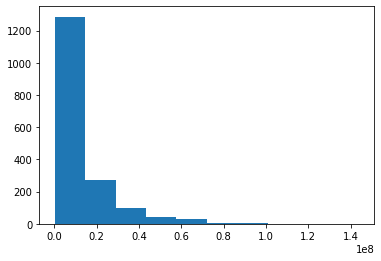

In [ ]:
plt.hist(outfield['Value'])

(array([ 22.,  76., 147., 256., 337., 329., 267., 204.,  93.,  15.]),
 array([12.32385568, 12.9700025 , 13.61614932, 14.26229613, 14.90844295,
        15.55458977, 16.20073659, 16.8468834 , 17.49303022, 18.13917704,
        18.78532386]),
 <a list of 10 Patch objects>)

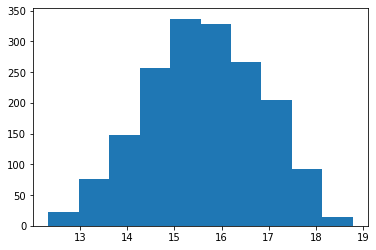

In [ ]:
plt.hist(np.log(outfield['Value']))

This data is much cleaner, and will probably have to use a log-transformation for final model.

Going to make a ton of scatter plots to see how variables correlate with value

In [ ]:
len(outfield.columns)

146

144 columns (excluding value and player name)

In [ ]:
col = outfield.columns.drop(['Value', 'Player'])
col

Index(['Age', 'Contract Years Left', 'MP (20/21)', 'Starts (20/21)',
       'Min (20/21)', 'Total Mins/90 (20/21)', 'Gls (20/21)', 'Ast (20/21)',
       'Non-Penalty Goals (20/21)', 'Penalties Scored (20/21)',
       ...
       'Aerial Duel Lost (20/21)', '% Aerial Duels Won (20/21)',
       'League_Bundesliga', 'League_La Liga', 'League_Ligue 1',
       'League_Premier League', 'League_Serie A', 'Position_D', 'Position_F',
       'Position_M'],
      dtype='object', length=144)

In [ ]:
#pp = sns.pairplot(data=outfield, y_vars=col,x_vars='Value')

Not immediately clear if there are any featuers that show a strong correlation. Let's try with log(transformation) of values.

In [ ]:
#outfield['Log Value'] = np.log(outfield['Value'])

#pp = sns.pairplot(data=outfield, y_vars=col, x_vars=['Log Value'])

#outfield = outfield.drop('Log Value', 1)

The variables show much more correlation with log(transform).

### Feature Selection

Now going to create a heatmap to see if I should eliminate some features from the model.

In [ ]:
outfield['Contract Years Left'] = pd.to_numeric(outfield['Contract Years Left'], errors='coerce')
outfield['Log Value'] = np.log(outfield['Value'])

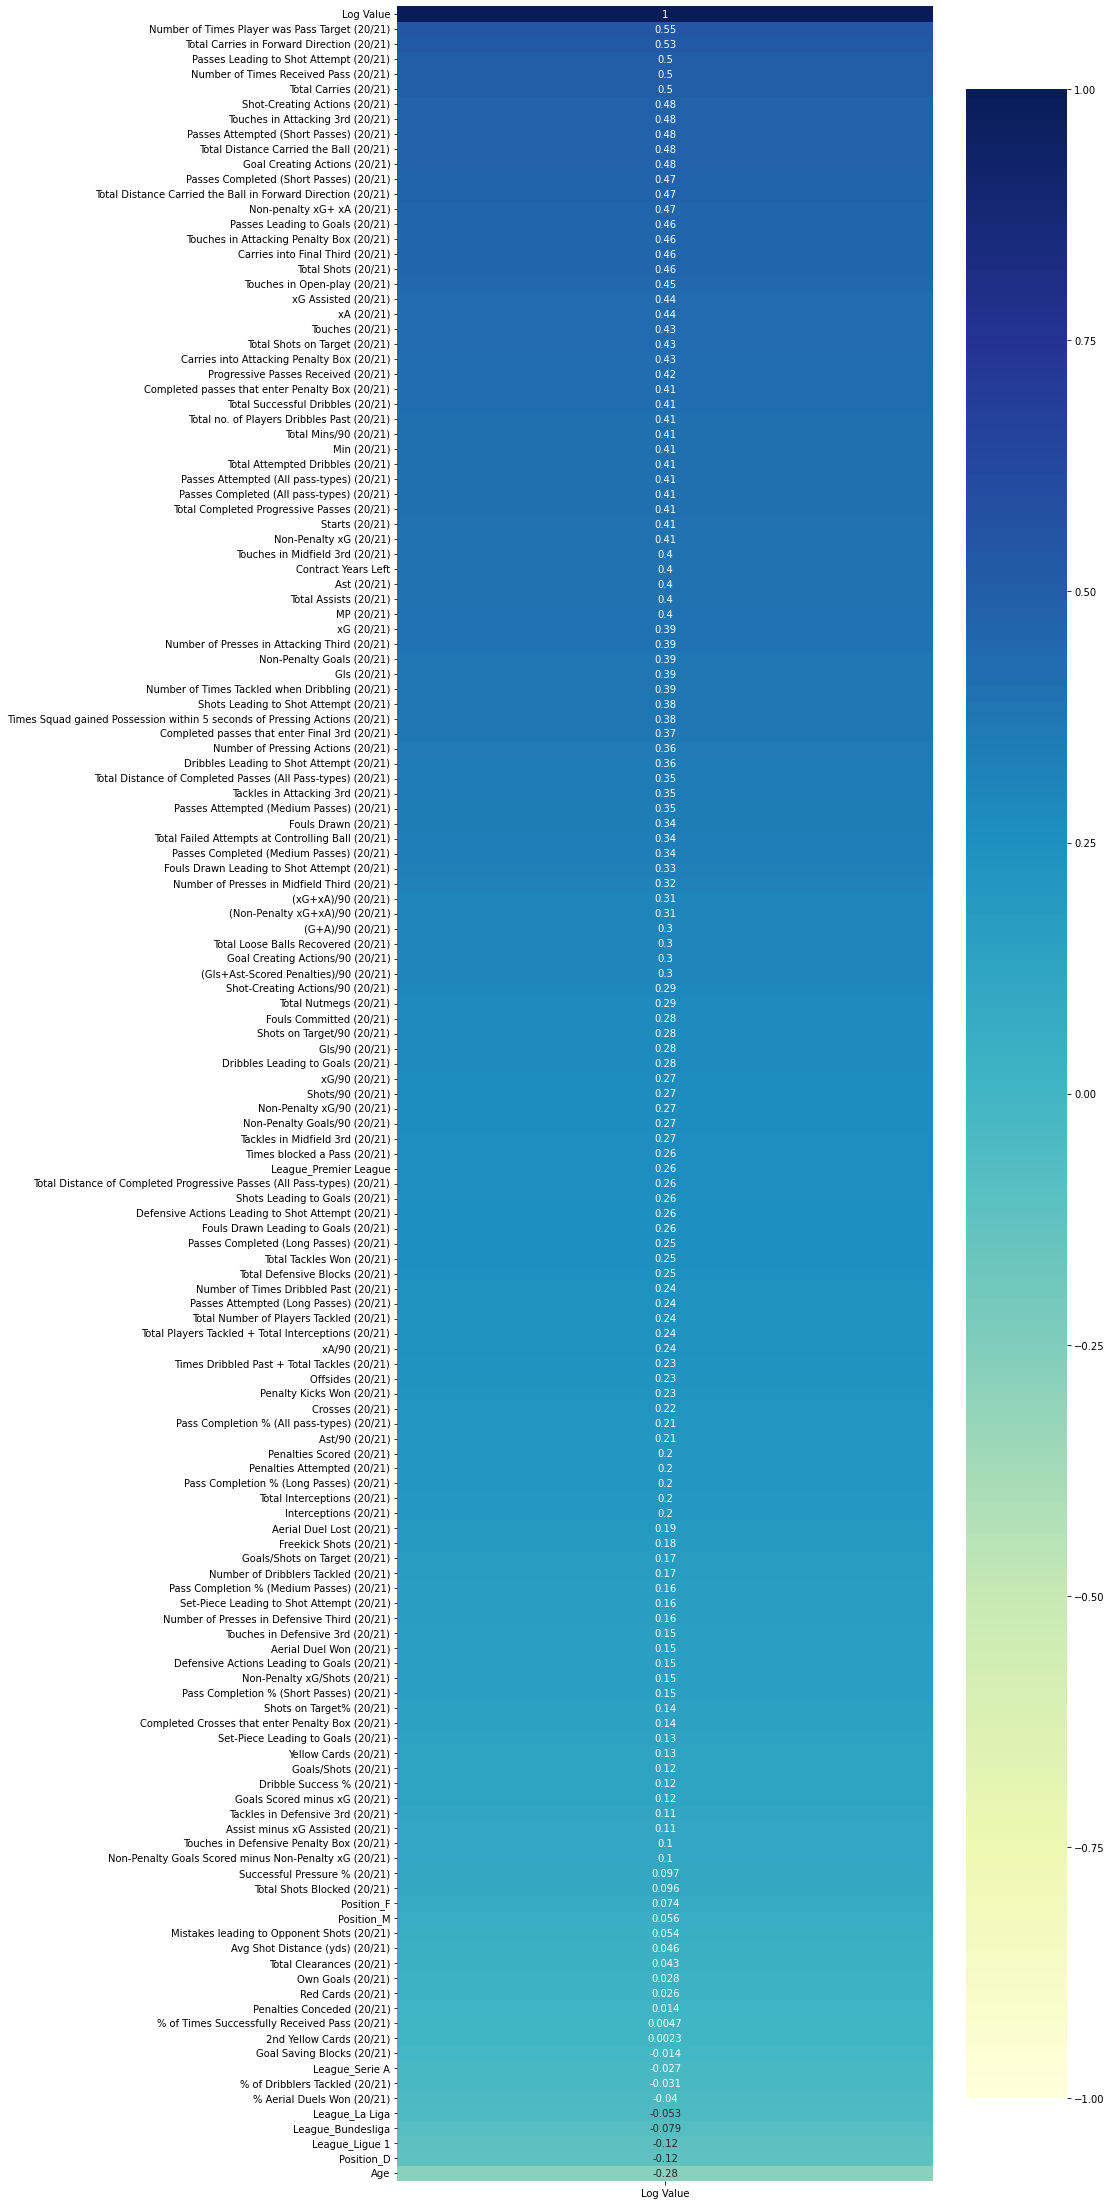

In [ ]:
temp = outfield.loc[:, outfield.columns != 'Player']
temp = temp.loc[:, temp.columns != 'Value']

fig, ax = plt.subplots(figsize=(12, 40))
sns.heatmap(temp.corr()[['Log Value']].sort_values('Log Value'),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

Going to run base models (no tuning) for the following sets of features:



*   All features
*   Best 110
*   Best 80
*   Best 50
*   Best 20



The 'Best' features are going to be calculated using the SelectKBest function of Sci-kit learn. Will be using Log_Value as target.

In [ ]:
# Create copy of DF with all features, but without player name, value, and contract years left

all_features = outfield.copy()
all_features = all_features.drop(columns=['Player', 'Value', 'Contract Years Left'])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# Get Best 110 features

select_oneten = SelectKBest(score_func=f_regression, k = 110)
oneten = select_oneten.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_oneten.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

print(f'Selected best 110 features: {feats[filter]}')

oneten_features = all_features.copy()
oneten_features.drop(oneten_features.columns.difference(feats[filter]), 1, inplace=True)
oneten_features['Log Value'] = all_features['Log Value'].copy()

Selected best 110 features: ['Age' 'MP (20/21)' 'Starts (20/21)' 'Min (20/21)' 'Total Mins/90 (20/21)'
 'Gls (20/21)' 'Ast (20/21)' 'Non-Penalty Goals (20/21)'
 'Penalties Scored (20/21)' 'Penalties Attempted (20/21)' 'Gls/90 (20/21)'
 'Ast/90 (20/21)' '(G+A)/90 (20/21)' 'Non-Penalty Goals/90 (20/21)'
 '(Gls+Ast-Scored Penalties)/90 (20/21)' 'xG (20/21)'
 'Non-Penalty xG (20/21)' 'xA (20/21)' 'Non-penalty xG+ xA (20/21)'
 'xG/90 (20/21)' 'xA/90 (20/21)' '(xG+xA)/90 (20/21)'
 'Non-Penalty xG/90 (20/21)' '(Non-Penalty xG+xA)/90 (20/21)'
 'Total Shots (20/21)' 'Total Shots on Target (20/21)' 'Shots/90 (20/21)'
 'Shots on Target/90 (20/21)' 'Goals/Shots on Target (20/21)'
 'Freekick Shots (20/21)' 'Shot-Creating Actions (20/21)'
 'Shot-Creating Actions/90 (20/21)'
 'Passes Leading to Shot Attempt (20/21)'
 'Set-Piece Leading to Shot Attempt (20/21)'
 'Dribbles Leading to Shot Attempt (20/21)'
 'Shots Leading to Shot Attempt (20/21)'
 'Fouls Drawn Leading to Shot Attempt (20/21)'
 'Defensiv

In [ ]:
# Get Best 80 features

select_eighty = SelectKBest(score_func=f_regression, k = 80)
eighty = select_eighty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_eighty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

print(f'Selected best 80 features: {feats[filter]}')

eighty_features = all_features.copy()
eighty_features.drop(eighty_features.columns.difference(feats[filter]), 1, inplace=True)
eighty_features['Log Value'] = all_features['Log Value'].copy()

Selected best 80 features: ['Age' 'MP (20/21)' 'Starts (20/21)' 'Min (20/21)' 'Total Mins/90 (20/21)'
 'Gls (20/21)' 'Ast (20/21)' 'Non-Penalty Goals (20/21)' 'Gls/90 (20/21)'
 '(G+A)/90 (20/21)' 'Non-Penalty Goals/90 (20/21)'
 '(Gls+Ast-Scored Penalties)/90 (20/21)' 'xG (20/21)'
 'Non-Penalty xG (20/21)' 'xA (20/21)' 'Non-penalty xG+ xA (20/21)'
 'xG/90 (20/21)' '(xG+xA)/90 (20/21)' 'Non-Penalty xG/90 (20/21)'
 '(Non-Penalty xG+xA)/90 (20/21)' 'Total Shots (20/21)'
 'Total Shots on Target (20/21)' 'Shots/90 (20/21)'
 'Shots on Target/90 (20/21)' 'Shot-Creating Actions (20/21)'
 'Shot-Creating Actions/90 (20/21)'
 'Passes Leading to Shot Attempt (20/21)'
 'Dribbles Leading to Shot Attempt (20/21)'
 'Shots Leading to Shot Attempt (20/21)'
 'Fouls Drawn Leading to Shot Attempt (20/21)'
 'Defensive Actions Leading to Shot Attempt (20/21)'
 'Goal Creating Actions (20/21)' 'Goal Creating Actions/90 (20/21)'
 'Passes Leading to Goals (20/21)' 'Dribbles Leading to Goals (20/21)'
 'Shots Leadi

In [ ]:
# Get Best 50 features

select_fifty = SelectKBest(score_func=f_regression, k = 50)
fifty = select_fifty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_fifty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

print(f'Selected best 50 features: {feats[filter]}')

fifty_features = all_features.copy()
fifty_features.drop(fifty_features.columns.difference(feats[filter]), 1, inplace=True)
fifty_features['Log Value'] = all_features['Log Value'].copy()

Selected best 50 features: ['MP (20/21)' 'Starts (20/21)' 'Min (20/21)' 'Total Mins/90 (20/21)'
 'Gls (20/21)' 'Ast (20/21)' 'Non-Penalty Goals (20/21)' 'xG (20/21)'
 'Non-Penalty xG (20/21)' 'xA (20/21)' 'Non-penalty xG+ xA (20/21)'
 'Total Shots (20/21)' 'Total Shots on Target (20/21)'
 'Shot-Creating Actions (20/21)' 'Passes Leading to Shot Attempt (20/21)'
 'Dribbles Leading to Shot Attempt (20/21)'
 'Shots Leading to Shot Attempt (20/21)' 'Goal Creating Actions (20/21)'
 'Passes Leading to Goals (20/21)' 'Touches (20/21)'
 'Touches in Midfield 3rd (20/21)' 'Touches in Attacking 3rd (20/21)'
 'Touches in Attacking Penalty Box (20/21)' 'Touches in Open-play (20/21)'
 'Total Successful Dribbles (20/21)' 'Total Attempted Dribbles (20/21)'
 'Total no. of Players Dribbles Past (20/21)' 'Total Carries (20/21)'
 'Total Distance Carried the Ball (20/21)'
 'Total Distance Carried the Ball in Forward Direction (20/21)'
 'Total Carries in Forward Direction (20/21)'
 'Carries into Final Third 

In [ ]:
# Get Best 20 features

select_twenty = SelectKBest(score_func=f_regression, k = 20)
fifty = select_twenty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_twenty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

print(f'Selected best 20 features: {feats[filter]}')

twenty_features = all_features.copy()
twenty_features.drop(twenty_features.columns.difference(feats[filter]), 1, inplace=True)
twenty_features['Log Value'] = all_features['Log Value'].copy()

Selected best 20 features: ['xA (20/21)' 'Non-penalty xG+ xA (20/21)' 'Total Shots (20/21)'
 'Shot-Creating Actions (20/21)' 'Passes Leading to Shot Attempt (20/21)'
 'Goal Creating Actions (20/21)' 'Passes Leading to Goals (20/21)'
 'Touches in Attacking 3rd (20/21)'
 'Touches in Attacking Penalty Box (20/21)' 'Touches in Open-play (20/21)'
 'Total Carries (20/21)' 'Total Distance Carried the Ball (20/21)'
 'Total Distance Carried the Ball in Forward Direction (20/21)'
 'Total Carries in Forward Direction (20/21)'
 'Carries into Final Third (20/21)'
 'Number of Times Player was Pass Target (20/21)'
 'Number of Times Received Pass (20/21)'
 'Passes Completed (Short Passes) (20/21)'
 'Passes Attempted (Short Passes) (20/21)' 'xG Assisted (20/21)']


Now have five dataframes, each containing a different # of features.

In [ ]:
print('All Features')
display(all_features.head())

print('110 Features')
display(oneten_features.head())

print('80 Features')
display(eighty_features.head())

print('50 Features')
display(fifty_features.head())

print('20 Features')
display(twenty_features.head())

All Features


,Age,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots on Target% (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots (20/21),Goals/Shots on Target (20/21),Avg Shot Distance (yds) (20/21),Freekick Shots (20/21),Non-Penalty xG/Shots (20/21),Goals Scored minus xG (20/21),Non-Penalty Goals Scored minus Non-Penalty xG (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Set-Piece Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive Penalty Box (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Dribble Success % (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),% of Times Successfully Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Pass Completion % (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Assist minus xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Completed Crosses that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Defensive 3rd (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),% of Dribblers Tackled (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Successful Pressure % (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Total Shots Blocked (20/21),Goal Saving Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled + Total Interceptions (20/21),Total Clearances (20

110 Features


,Age,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Gls/90 (20/21),Ast/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),xA/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Goals/Shots on Target (20/21),Freekick Shots (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Set-Piece Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Fouls Drawn Leading to Goals (20/21),Defensive Actions Leading to Goals (20/21),Touches (20/21),Touches in Defensive 3rd (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Pass Completion % (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Pass Completion % (Medium Passes) (20/21),Passes Completed (Long Passes) (20/21),Passes Attempted (Long Passes) (20/21),Pass Completion % (Long Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Total Number of Players Tackled (20/21),Total Tackles Won (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Dribblers Tackled (20/21),Times Dribbled Past + Total Tackles (20/21),Number of Times Dribbled Past (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Number of Presses in Defensive Third (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Total Defensive Blocks (20/21),Times blocked a Pass (20/21),Total Interceptions (20/21),Total Players Tackled + Total Interceptions (20/21),Fouls Committed (20/21),Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),League_Premier League,Log Value
0,22,31.0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,1.02,0.26,1.29,0.79,1.06,24.6,20.1,4.6,24.7,0.93,0.17,1.11,0.76,0.93,98.0,47.0,3.71,1.78,0.45,2.0,107.0,4.05,69.0,0.0,19.0,7.0,10.0,2.0,28.0,1.06,13.0,7.0,2.0,5.0,1.0,1442.0,59.0,493.0,1021.0,277.0,1386.0,88.0,189.0,98.0,15.0,1163.0,6385.0,4313.0,261.0,72.0,69.0,72.0,65.0,1616.0,1221.0,322.0,812.0,1033.0,78.6,11138.0,2052.0,519.0,618.0,232.0,279.0,83.2,32.0,59.0,54.2,7.0,4.6,

80 Features


,Age,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Gls/90 (20/21),(G+A)/90 (20/21),Non-Penalty Goals/90 (20/21),(Gls+Ast-Scored Penalties)/90 (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),xG/90 (20/21),(xG+xA)/90 (20/21),Non-Penalty xG/90 (20/21),(Non-Penalty xG+xA)/90 (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shots/90 (20/21),Shots on Target/90 (20/21),Shot-Creating Actions (20/21),Shot-Creating Actions/90 (20/21),Passes Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Fouls Drawn Leading to Shot Attempt (20/21),Defensive Actions Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Goal Creating Actions/90 (20/21),Passes Leading to Goals (20/21),Dribbles Leading to Goals (20/21),Shots Leading to Goals (20/21),Touches (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Total no. of Players Dribbles Past (20/21),Total Nutmegs (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Total Failed Attempts at Controlling Ball (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Total Distance of Completed Progressive Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Passes Completed (Medium Passes) (20/21),Passes Attempted (Medium Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Tackles in Midfield 3rd (20/21),Tackles in Attacking 3rd (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Number of Presses in Midfield Third (20/21),Number of Presses in Attacking Third (20/21),Times blocked a Pass (20/21),Fouls Committed (20/21),Fouls Drawn (20/21),Total Loose Balls Recovered (20/21),League_Premier League,Log Value
0,22,31.0,27.0,2380.0,26.4,27.0,7.0,21.0,1.02,1.29,0.79,1.06,24.6,20.1,4.6,24.7,0.93,1.11,0.76,0.93,98.0,47.0,3.71,1.78,107.0,4.05,69.0,19.0,7.0,10.0,2.0,28.0,1.06,13.0,7.0,2.0,1442.0,493.0,1021.0,277.0,1386.0,88.0,189.0,98.0,15.0,1163.0,6385.0,4313.0,261.0,72.0,69.0,72.0,65.0,1616.0,1221.0,322.0,812.0,1033.0,11138.0,2052.0,519.0,618.0,232.0,279.0,7.0,4.6,37.0,36.0,61.0,1.0,5.0,183.0,57.0,52.0,124.0,11.0,23.0,38.0,109.0,0,18.785324
1,21,28.0,27.0,2407.0,26.7,27.0,6.0,25.0,1.01,1.23,0.93,1.16,23.7,20.5,5.4,25.9,0.89,1.09,0.77,0.97,90.0,47.0,3.37,1.76,62.0,2.32,39.0,10.0,9.0,3.0,1.0,16.0,0.60,10.0,4.0,2.0,762.0,319.0,444.0,190.0,716.0,28.0,43.0,29.0,0.0,461.0,2326.0,1364.0,79.0,27.0,23.0,56.0,23.0,1100.0,548.0,222.0,360.0,490.0,4932.0,811.0,222.0,286.0,99.0,135.0,6.0,5.4,17.0,17.0,32.0,2.0,3.0,320.0,105.0,90.0,222.0,11.0,21.0,22.0,96.0,0,18.577684
2,28,35.0,35.0,3082.0,34.2,23.0,14.0,19.0,0.67,1.08,0.55,0.96,20.5,17.5,7.4,24.8,0.60,0.81,0.51,0.73,134.0,47.0,3.91,1.37,113.0,3.30,70.0,18.0,9.0,12.0,2.0,25.0,0.73,15.0,6.0,0.0,1396.0,736.0,616.0,166.0,1341.0,46.0,79.0,47.0,8.0,897.0,4616.0,2537.0,150.0,53.0,26.0,61.0,71.0,1761.0,1055.0,223.0,657.0,937.0,12519.0,3835.0,300.0,385.0,236.0,316.0,14.0,7.4,98.0,41.0,125.0,12.0,3.0,391.0,99.0,190.0,180.0,17.0,26.0,60.0,155.0,1,18.497642
3,21,26.0,24.0,2062.0,22.9,8.0,11.0,7.0,0.35,0.83,0.31,0.79,7.4,6.6,6.8,13.4,0.32,0.62,0.29,0.5

50 Features


,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),xG (20/21),Non-Penalty xG (20/21),xA (20/21),Non-penalty xG+ xA (20/21),Total Shots (20/21),Total Shots on Target (20/21),Shot-Creating Actions (20/21),Passes Leading to Shot Attempt (20/21),Dribbles Leading to Shot Attempt (20/21),Shots Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Passes Leading to Goals (20/21),Touches (20/21),Touches in Midfield 3rd (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Successful Dribbles (20/21),Total Attempted Dribbles (20/21),Total no. of Players Dribbles Past (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Carries into Attacking Penalty Box (20/21),Number of Times Tackled when Dribbling (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),Progressive Passes Received (20/21),Passes Completed (All pass-types) (20/21),Passes Attempted (All pass-types) (20/21),Total Distance of Completed Passes (All Pass-types) (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),Total Assists (20/21),xG Assisted (20/21),Completed passes that enter Final 3rd (20/21),Completed passes that enter Penalty Box (20/21),Total Completed Progressive Passes (20/21),Number of Pressing Actions (20/21),Times Squad gained Possession within 5 seconds of Pressing Actions (20/21),Number of Presses in Attacking Third (20/21),Log Value
0,31.0,27.0,2380.0,26.4,27.0,7.0,21.0,24.6,20.1,4.6,24.7,98.0,47.0,107.0,69.0,19.0,7.0,28.0,13.0,1442.0,493.0,1021.0,277.0,1386.0,88.0,189.0,98.0,1163.0,6385.0,4313.0,261.0,72.0,69.0,65.0,1616.0,1221.0,322.0,812.0,1033.0,11138.0,519.0,618.0,7.0,4.6,37.0,36.0,61.0,183.0,57.0,124.0,18.785324
1,28.0,27.0,2407.0,26.7,27.0,6.0,25.0,23.7,20.5,5.4,25.9,90.0,47.0,62.0,39.0,10.0,9.0,16.0,10.0,762.0,319.0,444.0,190.0,716.0,28.0,43.0,29.0,461.0,2326.0,1364.0,79.0,27.0,23.0,23.0,1100.0,548.0,222.0,360.0,490.0,4932.0,222.0,286.0,6.0,5.4,17.0,17.0,32.0,320.0,105.0,222.0,18.577684
2,35.0,35.0,3082.0,34.2,23.0,14.0,19.0,20.5,17.5,7.4,24.8,134.0,47.0,113.0,70.0,18.0,9.0,25.0,15.0,1396.0,736.0,616.0,166.0,1341.0,46.0,79.0,47.0,897.0,4616.0,2537.0,150.0,53.0,26.0,71.0,1761.0,1055.0,223.0,657.0,937.0,12519.0,300.0,385.0,14.0,7.4,98.0,41.0,125.0,391.0,99.0,180.0,18.497642
3,26.0,24.0,2062.0,22.9,8.0,11.0,7.0,7.4,6.6,6.8,13.4,51.0,15.0,125.0,87.0,11.0,3.0,22.0,17.0,1791.0,721.0,1064.0,134.0,1653.0,91.0,163.0,96.0,1412.0,7503.0,4320.0,239.0,81.0,51.0,41.0,1693.0,1403.0,218.0,1160.0,1474.0,17976.0,655.0,754.0,11.0,6.8,56.0,82.0,148.0,255.0,93.0,112.0,18.315320
4,37.0,34.0,3078.0,34.2,22.0,5.0,16.0,20.9,16.4,6.3,22.6,120.0,46.0,117.0,87.0,6.0,12.0,14.0,10.0,1758.0,621.0,1162.0,313.0,1724.0,50.0,98.0,56.0,1367.0,6332.0,3460.0,218.0,52.0,54.0,92.0,2137.0,1444.0,415.0,1071.0,1288.0,16219.0,632.0,696.0,5.0,6.3,61.0,74.0,137.0,553.0,153.0,343.0,18.315320


20 Features


,xA (20/21),Non-penalty xG+ xA (20/21),Total Shots (20/21),Shot-Creating Actions (20/21),Passes Leading to Shot Attempt (20/21),Goal Creating Actions (20/21),Passes Leading to Goals (20/21),Touches in Attacking 3rd (20/21),Touches in Attacking Penalty Box (20/21),Touches in Open-play (20/21),Total Carries (20/21),Total Distance Carried the Ball (20/21),Total Distance Carried the Ball in Forward Direction (20/21),Total Carries in Forward Direction (20/21),Carries into Final Third (20/21),Number of Times Player was Pass Target (20/21),Number of Times Received Pass (20/21),Passes Completed (Short Passes) (20/21),Passes Attempted (Short Passes) (20/21),xG Assisted (20/21),Log Value
0,4.6,24.7,98.0,107.0,69.0,28.0,13.0,1021.0,277.0,1386.0,1163.0,6385.0,4313.0,261.0,72.0,1616.0,1221.0,519.0,618.0,4.6,18.785324
1,5.4,25.9,90.0,62.0,39.0,16.0,10.0,444.0,190.0,716.0,461.0,2326.0,1364.0,79.0,27.0,1100.0,548.0,222.0,286.0,5.4,18.577684
2,7.4,24.8,134.0,113.0,70.0,25.0,15.0,616.0,166.0,1341.0,897.0,4616.0,2537.0,150.0,53.0,1761.0,1055.0,300.0,385.0,7.4,18.497642
3,6.8,13.4,51.0,125.0,87.0,22.0,17.0,1064.0,134.0,1653.0,1412.0,7503.0,4320.0,239.0,81.0,1693.0,1403.0,655.0,754.0,6.8,18.315320
4,6.3,22.6,120.0,117.0,87.0,14.0,10.0,1162.0,313.0,1724.0,1367.0,6332.0,3460.0,218.0,52.0,2137.0,1444.0,632.0,696.0,6.3,18.315320


In [ ]:
all_features.to_csv('all_features.csv', encoding='utf-8', index=False)
oneten_features.to_csv('oneten_features.csv', encoding='utf-8', index=False)
eighty_features.to_csv('eighty_features.csv', encoding='utf-8', index=False)
fifty_features.to_csv('fifty_features.csv', encoding='utf-8', index=False)
twenty_features.to_csv('twenty_features.csv', encoding='utf-8', index=False)

## Model Testing

### Setup

Will put each of the five data frames through the following models (with minimal tuning - real tuning will come after choosing the best type of model):

*   Multiple (Simple) Linear Regression
*   Lasso Regression
*   Ridge Regression
*   XGBoost Regressor
*   ElasticNet Regression
*   CatBoost Regressor
*   Random Forest Regressor
*   K-Nearest Neighbors

The regression metric used will be the Mean Absolute Percentage Error (MAPE), but, because I have log-transformed the data, it will reflect the log percentage.

Each dataset will be split into train and test sets (test_size being 10% of data). Will train on the 90%, and evaluate the MAPE on the remaining 10%).

In [ ]:
models_list = {'Feature #': ['All_Features', '110_Features', '80_Features', '50_Features', '20_Features']}

results = pd.DataFrame(data = models_list)

linreg = np.zeros(5)
results['LinReg'] = linreg.copy()
results['Lasso'] = linreg.copy()
results['Ridge'] = linreg.copy()
results['XGBoost'] = linreg.copy()
results['ElasticNet'] = linreg.copy()
results['CatBoost'] = linreg.copy()
results['RandomForest'] = linreg.copy()
results['KNN'] = linreg.copy()

results.head()

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20_Features,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Creating Train-Test Splits

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(all_features.drop(columns=['Log Value']), all_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_oneten, X_test_oneten, y_train_oneten, y_test_oneten = train_test_split(oneten_features.drop(columns=['Log Value']), oneten_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_eighty, X_test_eighty, y_train_eighty, y_test_eighty = train_test_split(eighty_features.drop(columns=['Log Value']), eighty_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_fifty, X_test_fifty, y_train_fifty, y_test_fifty = train_test_split(fifty_features.drop(columns=['Log Value']), fifty_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_twenty, X_test_twenty, y_train_twenty, y_test_twenty = train_test_split(twenty_features.drop(columns=['Log Value']), twenty_features['Log Value'], random_state = 42, test_size = 0.10)

### Multiple (Simple) Linear Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
## All Features - MLR

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,1] = mape_test*100

Test Data MAPE for All Features: 0.04071761342118302


In [ ]:
## 110 Features - MLR

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,1] = mape_test*100

Test Data MAPE for 110 Features: 0.041556319585747827


In [ ]:
## 80 Features - MLR

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,1] = mape_test*100

Test Data MAPE for All Features: 0.04459518800152061


In [ ]:
## 50 Features - MLR

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,1] = mape_test*100

Test Data MAPE for All Features: 0.05152385357174221


In [ ]:
## 20 Features - MLR

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,1] = mape_test*100

Test Data MAPE for All Features: 0.05247610356106332


In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110_Features,4.155632,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80_Features,4.459519,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50_Features,5.152385,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20_Features,5.247610,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Lasso Regression

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

grid = {'alpha': [0, 0.01, 0.1, 1]}
cv = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state = 42)
model = Lasso()

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs =-1)

In [ ]:
## All Features - Lasso

res_all = search.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, search.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test} with Hyperparameters: {res_all.best_params_}')
results.iat[0,2] = mape_test*100

Test Data MAPE for All Features: 0.04114437282511117 with Hyperparameters: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.441e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 110 Features - Lasso

res_oneten = search.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, search.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test} with Hyperparameters: {res_oneten.best_params_}')
results.iat[1,2] = mape_test*100

Test Data MAPE for 110 Features: 0.04191567673759582 with Hyperparameters: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.587e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 80 Features - Lasso

res_eighty = search.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, search.predict(X_test_eighty))

print(f'Test Data MAPE for 80 Features: {mape_test} with Hyperparameters: {res_eighty.best_params_}')
results.iat[2,2] = mape_test*100

Test Data MAPE for 80 Features: 0.044110203518787534 with Hyperparameters: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.704e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 50 Features - Lasso

res_fifty = search.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, search.predict(X_test_fifty))

print(f'Test Data MAPE for 50 Features: {mape_test} with Hyperparameters: {res_fifty.best_params_}')
results.iat[3,2] = mape_test*100

Test Data MAPE for 50 Features: 0.051730335104887136 with Hyperparameters: {'alpha': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.245e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 20 Features - Lasso

res_twenty = search.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, search.predict(X_test_twenty))

print(f'Test Data MAPE for 20 Features: {mape_test} with Hyperparameters: {res_twenty.best_params_}')
results.iat[4,2] = mape_test*100

Test Data MAPE for 20 Features: 0.052518261254627156 with Hyperparameters: {'alpha': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.181e+02, tolerance: 2.371e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### Ride Regression

In [ ]:
from sklearn.linear_model import Ridge

grid = {'alpha': np.arange(0, 1, 0.05)}
cv = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state = 42)
model = Ridge()

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs =-1)

In [ ]:
## All Features - Ridge

res_all = search.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, search.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test} with Hyperparameters: {res_all.best_params_}')
results.iat[0,3] = mape_test*100

Test Data MAPE for All Features: 0.04095197223845263 with Hyperparameters: {'alpha': 0.9500000000000001}


In [ ]:
## 110 Features - Ridge

res_oneten = search.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, search.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test} with Hyperparameters: {res_oneten.best_params_}')
results.iat[1,3] = mape_test*100

Test Data MAPE for 110 Features: 0.04160111860646251 with Hyperparameters: {'alpha': 0.9500000000000001}


In [ ]:
## 80 Features - Ridge

res_eighty = search.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, search.predict(X_test_eighty))

print(f'Test Data MAPE for 80 Features: {mape_test} with Hyperparameters: {res_eighty.best_params_}')
results.iat[2,3] = mape_test*100

Test Data MAPE for 80 Features: 0.04446740109942147 with Hyperparameters: {'alpha': 0.9500000000000001}


In [ ]:
## 50 Features - Ridge

res_fifty = search.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, search.predict(X_test_fifty))

print(f'Test Data MAPE for 50 Features: {mape_test} with Hyperparameters: {res_fifty.best_params_}')
results.iat[3,3] = mape_test*100

Test Data MAPE for 50 Features: 0.05152672372238831 with Hyperparameters: {'alpha': 0.9500000000000001}


In [ ]:
## 20 Features - Ridge

res_twenty = search.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, search.predict(X_test_twenty))

print(f'Test Data MAPE for 20 Features: {mape_test} with Hyperparameters: {res_twenty.best_params_}')
results.iat[4,3] = mape_test*100

Test Data MAPE for 20 Features: 0.052476212265423476 with Hyperparameters: {'alpha': 0.9500000000000001}


### XGBoost

In [ ]:
import xgboost
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror')

In [ ]:
## All Features - XGBoost

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,4] = mape_test*100

Test Data MAPE for All Features: 0.03871421760904946


In [ ]:
## 110 Features - XGBoost

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,4] = mape_test*100

Test Data MAPE for 110 Features: 0.038637651826859944


In [ ]:
## 80 Features - XGBoost

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,4] = mape_test*100

Test Data MAPE for All Features: 0.04085825290664386


In [ ]:
## 50 Features - XGBoost

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,4] = mape_test*100

Test Data MAPE for All Features: 0.05215210812978305


In [ ]:
## 20 Features - XGBoost

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,4] = mape_test*100

Test Data MAPE for All Features: 0.054129053993013314


### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

grid = {'alpha': np.arange(0, 1, 0.2), 
        'l1_ratio': np.arange(0, 1, 0.5)}
cv = RepeatedKFold(n_splits = 3, n_repeats = 3, random_state = 42)
model = ElasticNet()

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs =-1)

In [ ]:
## All Features - ElasticNet

res_all = search.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, search.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test} with Hyperparameters: {res_all.best_params_}')
results.iat[0,5] = mape_test*100

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.075e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

Test Data MAPE for All Features: 0.040967498963343625 with Hyperparameters: {'alpha': 0.0, 'l1_ratio': 0.0}


In [ ]:
## 110 Features - ElasticNet

res_oneten = search.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, search.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test} with Hyperparameters: {res_oneten.best_params_}')
results.iat[1,5] = mape_test*100

Test Data MAPE for 110 Features: 0.04163046563068711 with Hyperparameters: {'alpha': 0.0, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.306e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

In [ ]:
## 80 Features - ElasticNet

res_eighty = search.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, search.predict(X_test_eighty))

print(f'Test Data MAPE for 80 Features: {mape_test} with Hyperparameters: {res_eighty.best_params_}')
results.iat[2,5] = mape_test*100

Test Data MAPE for 80 Features: 0.04466664555520951 with Hyperparameters: {'alpha': 0.0, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.522e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

In [ ]:
## 50 Features - ElasticNet

res_fifty = search.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, search.predict(X_test_fifty))

print(f'Test Data MAPE for 50 Features: {mape_test} with Hyperparameters: {res_fifty.best_params_}')
results.iat[3,5] = mape_test*100

Test Data MAPE for 50 Features: 0.05164716272199233 with Hyperparameters: {'alpha': 0.8, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.415e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
## 20 Features - ElasticNet

res_twenty = search.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, search.predict(X_test_twenty))

print(f'Test Data MAPE for 20 Features: {mape_test} with Hyperparameters: {res_twenty.best_params_}')
results.iat[4,5] = mape_test*100

Test Data MAPE for 20 Features: 0.05250203636672136 with Hyperparameters: {'alpha': 0.8, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.898e+02, tolerance: 2.371e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,4.114437,4.095197,3.871422,4.096750,0.0,0.0,0.0
1,110_Features,4.155632,4.191568,4.160112,3.863765,4.163047,0.0,0.0,0.0
2,80_Features,4.459519,4.411020,4.446740,4.085825,4.466665,0.0,0.0,0.0
3,50_Features,5.152385,5.173034,5.152672,5.215211,5.164716,0.0,0.0,0.0
4,20_Features,5.247610,5.251826,5.247621,5.412905,5.250204,0.0,0.0,0.0


### CatBoost 

In [ ]:
pip install catboost

In [ ]:
import catboost
from catboost import CatBoostRegressor

model = CatBoostRegressor(loss_function = 'MAPE')

In [ ]:
## All Features - CatBoost

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,6] = mape_test*100

0:	learn: 0.0645056	total: 71.6ms	remaining: 1m 11s
1:	learn: 0.0638743	total: 91.5ms	remaining: 45.7s
2:	learn: 0.0632163	total: 112ms	remaining: 37.1s
3:	learn: 0.0625282	total: 131ms	remaining: 32.6s
4:	learn: 0.0618456	total: 150ms	remaining: 29.9s
5:	learn: 0.0612425	total: 169ms	remaining: 28s
6:	learn: 0.0606394	total: 188ms	remaining: 26.7s
7:	learn: 0.0600368	total: 216ms	remaining: 26.8s
8:	learn: 0.0593111	total: 239ms	remaining: 26.3s
9:	learn: 0.0587717	total: 261ms	remaining: 25.8s
10:	learn: 0.0581694	total: 288ms	remaining: 25.9s
11:	learn: 0.0577623	total: 308ms	remaining: 25.4s
12:	learn: 0.0572127	total: 332ms	remaining: 25.2s
13:	learn: 0.0567302	total: 353ms	remaining: 24.9s
14:	learn: 0.0563028	total: 373ms	remaining: 24.5s
15:	learn: 0.0558118	total: 394ms	remaining: 24.2s
16:	learn: 0.0554035	total: 417ms	remaining: 24.1s
17:	learn: 0.0549368	total: 437ms	remaining: 23.8s
18:	learn: 0.0543906	total: 456ms	remaining: 23.6s
19:	learn: 0.0538777	total: 476ms	remain

In [ ]:
## 110 Features - CatBoost

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,6] = mape_test*100

0:	learn: 0.0643217	total: 25.6ms	remaining: 25.6s
1:	learn: 0.0636671	total: 41.8ms	remaining: 20.9s
2:	learn: 0.0629901	total: 61.9ms	remaining: 20.6s
3:	learn: 0.0623105	total: 78.6ms	remaining: 19.6s
4:	learn: 0.0616138	total: 95ms	remaining: 18.9s
5:	learn: 0.0610608	total: 112ms	remaining: 18.5s
6:	learn: 0.0604583	total: 134ms	remaining: 19s
7:	learn: 0.0597866	total: 159ms	remaining: 19.7s
8:	learn: 0.0592935	total: 175ms	remaining: 19.3s
9:	learn: 0.0586647	total: 192ms	remaining: 19s
10:	learn: 0.0580921	total: 208ms	remaining: 18.7s
11:	learn: 0.0576193	total: 229ms	remaining: 18.8s
12:	learn: 0.0571293	total: 245ms	remaining: 18.6s
13:	learn: 0.0566676	total: 268ms	remaining: 18.9s
14:	learn: 0.0561353	total: 285ms	remaining: 18.7s
15:	learn: 0.0556519	total: 310ms	remaining: 19.1s
16:	learn: 0.0552353	total: 331ms	remaining: 19.1s
17:	learn: 0.0548256	total: 353ms	remaining: 19.3s
18:	learn: 0.0543282	total: 370ms	remaining: 19.1s
19:	learn: 0.0537671	total: 387ms	remainin

In [ ]:
## 80 Features - CatBoost

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,6] = mape_test*100

0:	learn: 0.0645538	total: 17.5ms	remaining: 17.5s
1:	learn: 0.0637981	total: 30.3ms	remaining: 15.1s
2:	learn: 0.0631361	total: 43ms	remaining: 14.3s
3:	learn: 0.0624726	total: 63.4ms	remaining: 15.8s
4:	learn: 0.0618679	total: 86.2ms	remaining: 17.1s
5:	learn: 0.0612282	total: 99.5ms	remaining: 16.5s
6:	learn: 0.0605671	total: 113ms	remaining: 16s
7:	learn: 0.0599670	total: 127ms	remaining: 15.8s
8:	learn: 0.0594265	total: 149ms	remaining: 16.4s
9:	learn: 0.0589626	total: 162ms	remaining: 16.1s
10:	learn: 0.0584068	total: 176ms	remaining: 15.8s
11:	learn: 0.0577711	total: 189ms	remaining: 15.6s
12:	learn: 0.0571496	total: 206ms	remaining: 15.7s
13:	learn: 0.0567338	total: 219ms	remaining: 15.5s
14:	learn: 0.0562013	total: 232ms	remaining: 15.3s
15:	learn: 0.0556889	total: 248ms	remaining: 15.3s
16:	learn: 0.0552415	total: 261ms	remaining: 15.1s
17:	learn: 0.0546783	total: 278ms	remaining: 15.2s
18:	learn: 0.0541947	total: 291ms	remaining: 15s
19:	learn: 0.0536777	total: 304ms	remaini

In [ ]:
## 50 Features - CatBoost

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,6] = mape_test*100

0:	learn: 0.0645516	total: 11.1ms	remaining: 11.1s
1:	learn: 0.0640374	total: 20ms	remaining: 9.98s
2:	learn: 0.0635575	total: 29.1ms	remaining: 9.67s
3:	learn: 0.0630906	total: 37.9ms	remaining: 9.44s
4:	learn: 0.0626166	total: 46.6ms	remaining: 9.28s
5:	learn: 0.0621448	total: 57.7ms	remaining: 9.56s
6:	learn: 0.0617017	total: 67.4ms	remaining: 9.56s
7:	learn: 0.0613091	total: 76.3ms	remaining: 9.46s
8:	learn: 0.0609005	total: 85.6ms	remaining: 9.42s
9:	learn: 0.0604669	total: 97.2ms	remaining: 9.63s
10:	learn: 0.0600917	total: 118ms	remaining: 10.6s
11:	learn: 0.0597178	total: 128ms	remaining: 10.5s
12:	learn: 0.0593068	total: 142ms	remaining: 10.8s
13:	learn: 0.0589314	total: 151ms	remaining: 10.6s
14:	learn: 0.0585827	total: 160ms	remaining: 10.5s
15:	learn: 0.0582220	total: 170ms	remaining: 10.4s
16:	learn: 0.0578838	total: 181ms	remaining: 10.4s
17:	learn: 0.0575684	total: 190ms	remaining: 10.3s
18:	learn: 0.0572614	total: 208ms	remaining: 10.7s
19:	learn: 0.0569886	total: 218ms

In [ ]:
## 20 Features - CatBoost

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,6] = mape_test*100

0:	learn: 0.0646085	total: 5.4ms	remaining: 5.39s
1:	learn: 0.0641293	total: 12.9ms	remaining: 6.44s
2:	learn: 0.0636671	total: 20.6ms	remaining: 6.83s
3:	learn: 0.0631667	total: 25.3ms	remaining: 6.31s
4:	learn: 0.0626727	total: 29.9ms	remaining: 5.94s
5:	learn: 0.0621740	total: 34.2ms	remaining: 5.66s
6:	learn: 0.0616845	total: 38.7ms	remaining: 5.5s
7:	learn: 0.0612529	total: 43.2ms	remaining: 5.36s
8:	learn: 0.0607690	total: 47.8ms	remaining: 5.26s
9:	learn: 0.0603427	total: 55.7ms	remaining: 5.52s
10:	learn: 0.0599405	total: 60.2ms	remaining: 5.42s
11:	learn: 0.0596032	total: 64.8ms	remaining: 5.34s
12:	learn: 0.0592799	total: 69.6ms	remaining: 5.29s
13:	learn: 0.0589305	total: 74ms	remaining: 5.21s
14:	learn: 0.0586235	total: 78.7ms	remaining: 5.17s
15:	learn: 0.0583332	total: 83.1ms	remaining: 5.11s
16:	learn: 0.0580080	total: 87.5ms	remaining: 5.06s
17:	learn: 0.0576830	total: 92.1ms	remaining: 5.03s
18:	learn: 0.0574205	total: 96.5ms	remaining: 4.98s
19:	learn: 0.0571300	total

In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,4.114437,4.095197,3.871422,4.096750,3.809443,0.0,0.0
1,110_Features,4.155632,4.191568,4.160112,3.863765,4.163047,3.757891,0.0,0.0
2,80_Features,4.459519,4.411020,4.446740,4.085825,4.466665,3.977971,0.0,0.0
3,50_Features,5.152385,5.173034,5.152672,5.215211,5.164716,5.186047,0.0,0.0
4,20_Features,5.247610,5.251826,5.247621,5.412905,5.250204,5.459794,0.0,0.0


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42, criterion='absolute_error')

In [ ]:
## All Features - Random Forest

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,7] = mape_test*100

Test Data MAPE for All Features: 0.04116834175159362


In [ ]:
## 110 Features - Random Forest

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,7] = mape_test*100

Test Data MAPE for 110 Features: 0.04154399406400378


In [ ]:
## 80 Features - Random Forest

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,7] = mape_test*100

Test Data MAPE for All Features: 0.04320470954661972


In [ ]:
## 50 Features - Random Forest

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,7] = mape_test*100

Test Data MAPE for All Features: 0.0542940486346582


In [ ]:
## 20 Features - Random Forest

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,7] = mape_test*100

Test Data MAPE for All Features: 0.05538766514983429


In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,4.114437,4.095197,3.871422,4.096750,3.809443,4.116834,0.0
1,110_Features,4.155632,4.191568,4.160112,3.863765,4.163047,3.757891,4.154399,0.0
2,80_Features,4.459519,4.411020,4.446740,4.085825,4.466665,3.977971,4.320471,0.0
3,50_Features,5.152385,5.173034,5.152672,5.215211,5.164716,5.186047,5.429405,0.0
4,20_Features,5.247610,5.251826,5.247621,5.412905,5.250204,5.459794,5.538767,0.0


### K-Nearest Neighbors




In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

In [ ]:
## All Features - KNN

model.fit(X_train_all, y_train_all)

mape_test = mean_absolute_percentage_error(y_test_all, model.predict(X_test_all))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[0,8] = mape_test*100

Test Data MAPE for All Features: 0.05311157995061201


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## 110 Features - KNN

model.fit(X_train_oneten, y_train_oneten)

mape_test = mean_absolute_percentage_error(y_test_oneten, model.predict(X_test_oneten))

print(f'Test Data MAPE for 110 Features: {mape_test}')
results.iat[1,8] = mape_test*100

Test Data MAPE for 110 Features: 0.05294201999368592


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## 80 Features - KNN

model.fit(X_train_eighty, y_train_eighty)

mape_test = mean_absolute_percentage_error(y_test_eighty, model.predict(X_test_eighty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[2,8] = mape_test*100

Test Data MAPE for All Features: 0.054369713469161626


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## 50 Features - KNN

model.fit(X_train_fifty, y_train_fifty)

mape_test = mean_absolute_percentage_error(y_test_fifty, model.predict(X_test_fifty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[3,8] = mape_test*100

Test Data MAPE for All Features: 0.054610285950639145


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## 20 Features - KNN

model.fit(X_train_twenty, y_train_twenty)

mape_test = mean_absolute_percentage_error(y_test_twenty, model.predict(X_test_twenty))

print(f'Test Data MAPE for All Features: {mape_test}')
results.iat[4,8] = mape_test*100

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Test Data MAPE for All Features: 0.0599973536870007


In [ ]:
results

,Feature #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,All_Features,4.071761,4.114437,4.095197,3.871422,4.096750,3.809443,4.116834,5.311158
1,110_Features,4.155632,4.191568,4.160112,3.863765,4.163047,3.757891,4.154399,5.294202
2,80_Features,4.459519,4.411020,4.446740,4.085825,4.466665,3.977971,4.320471,5.436971
3,50_Features,5.152385,5.173034,5.152672,5.215211,5.164716,5.186047,5.429405,5.461029
4,20_Features,5.247610,5.251826,5.247621,5.412905,5.250204,5.459794,5.538767,5.999735


### Conclusion of Model Selection

In [ ]:
display(results)

,Features #,LinReg,Lasso,Ridge,XGBoost,ElasticNet,CatBoost,RandomForest,KNN
0,143,4.071761,4.114437,4.095197,3.871422,4.096750,3.809443,4.116834,5.311158
1,110,4.155632,4.191568,4.160112,3.863765,4.163047,3.757891,4.154399,5.294202
2,80,4.459519,4.411020,4.446740,4.085825,4.466665,3.977971,4.320471,5.436971
3,50,5.152385,5.173034,5.152672,5.215211,5.164716,5.186047,5.429405,5.461029
4,20,5.247610,5.251826,5.247621,5.412905,5.250204,5.459794,5.538767,5.999735


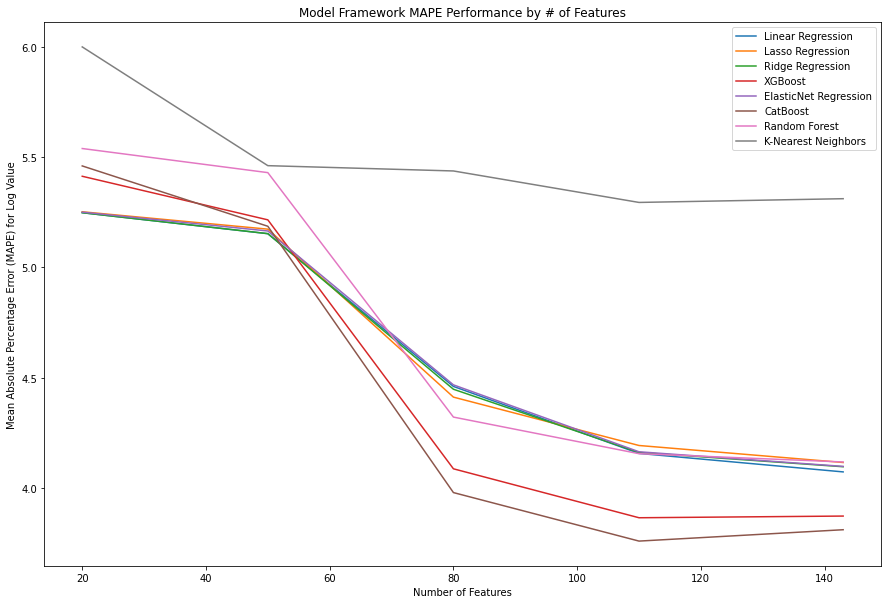

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(results['Features #'], results['LinReg'], label='Linear Regression')
plt.plot(results['Features #'], results['Lasso'], label='Lasso Regression')
plt.plot(results['Features #'], results['Ridge'], label='Ridge Regression')
plt.plot(results['Features #'], results['XGBoost'], label='XGBoost')
plt.plot(results['Features #'], results['ElasticNet'], label='ElasticNet Regression')
plt.plot(results['Features #'], results['CatBoost'], label='CatBoost')
plt.plot(results['Features #'], results['RandomForest'], label='Random Forest')
plt.plot(results['Features #'], results['KNN'], label='K-Nearest Neighbors')
plt.xlabel('Number of Features')
plt.ylabel('Mean Absolute Percentage Error (MAPE) for Log Value')
plt.title('Model Framework MAPE Performance by # of Features')
plt.legend()

CatBoost seems to work the best, and on the 110 feature set. This indicates that there is some best value for feature #s. Going to try some more #s of features between All and 110 for CatBoost to determine the best data set.

## Further Feature Selection

### Features

Going to compare results for CatBoost for features counts:

 All, 130, 125, 120, 115, and 110.

*   All
*   130
*   125
*   120
*   115
*   110

All and 110 are already calculated

In [ ]:
# 130 Feats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

select_onethirty = SelectKBest(score_func=f_regression, k = 130)
onethirty = select_onethirty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_onethirty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

#print(f'Selected best 130 features: {feats[filter]}')

onethirty_features = all_features.copy()
onethirty_features.drop(onethirty_features.columns.difference(feats[filter]), 1, inplace=True)
onethirty_features['Log Value'] = all_features['Log Value'].copy()

In [ ]:
# 125 Feats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

select_onetwofive = SelectKBest(score_func=f_regression, k = 125)
onetwofive = select_onetwofive.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_onetwofive.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

#print(f'Selected best 125 features: {feats[filter]}')

onetwofive_features = all_features.copy()
onetwofive_features.drop(onetwofive_features.columns.difference(feats[filter]), 1, inplace=True)
onetwofive_features['Log Value'] = all_features['Log Value'].copy()

In [ ]:
# 120 Feats

select_onetwenty = SelectKBest(score_func=f_regression, k = 120)
onetwenty = select_onetwenty.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_onetwenty.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

#print(f'Selected best 120 features: {feats[filter]}')

onetwenty_features = all_features.copy()
onetwenty_features.drop(onetwenty_features.columns.difference(feats[filter]), 1, inplace=True)
onetwenty_features['Log Value'] = all_features['Log Value'].copy()

In [ ]:
# 115 Feats

select_onefifteen = SelectKBest(score_func=f_regression, k = 115)
onefifteen = select_onefifteen.fit_transform(all_features.drop(columns=['Log Value']), all_features['Log Value'])

filter = select_onefifteen.get_support()
feats = np.array(all_features.drop(columns=['Log Value']).columns)

#print(f'Selected best 115 features: {feats[filter]}')

onefifteen_features = all_features.copy()
onefifteen_features.drop(onefifteen_features.columns.difference(feats[filter]), 1, inplace=True)
onefifteen_features['Log Value'] = all_features['Log Value'].copy()

### Model Testing pt 2

Going to repeat the process as before, but only for CatBoost

In [ ]:
X_train_onethirty, X_test_onethirty, y_train_onethirty, y_test_onethirty = train_test_split(onethirty_features.drop(columns=['Log Value']), onethirty_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_onetwofive, X_test_onetwofive, y_train_onetwofive, y_test_onetwofive = train_test_split(onetwofive_features.drop(columns=['Log Value']), onetwofive_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_onetwenty, X_test_onetwenty, y_train_onetwenty, y_test_onetwenty = train_test_split(onetwenty_features.drop(columns=['Log Value']), onetwenty_features['Log Value'], random_state = 42, test_size = 0.10)
X_train_onefifteen, X_test_onefifteen, y_train_onefifteen, y_test_onefifteen = train_test_split(onefifteen_features.drop(columns=['Log Value']), onefifteen_features['Log Value'], random_state = 42, test_size = 0.10)

In [ ]:
models_list = {'Feature #': ['All_Features', '130_Features', '125_Features','120_Features', '115_Features', '110_Features']}

results_two = pd.DataFrame(data = models_list)

linreg = np.zeros(6)
results_two['CatBoost'] = linreg.copy()

results_two.iat[0, 1] = results.iloc[0, 6]
results_two.iat[5, 1] = results.iloc[1, 6]

display(results_two)

,Feature #,CatBoost
0,All_Features,3.809443
1,130_Features,0.000000
2,125_Features,0.000000
3,120_Features,0.000000
4,115_Features,0.000000
5,110_Features,3.757891


In [ ]:
import catboost
from catboost import CatBoostRegressor

model = CatBoostRegressor(loss_function = 'MAPE')

In [ ]:
## 130 Features - CatBoost

model.fit(X_train_onethirty, y_train_onethirty)

mape_test = mean_absolute_percentage_error(y_test_onethirty, model.predict(X_test_onethirty))

print(f'Test Data MAPE for 130 Features: {mape_test}')
results_two.iat[1,1] = mape_test*100

In [ ]:
## 125 Features - CatBoost

model.fit(X_train_onetwofive, y_train_onetwofive)

mape_test = mean_absolute_percentage_error(y_test_onetwofive, model.predict(X_test_onetwofive))

print(f'Test Data MAPE for 125 Features: {mape_test}')
results_two.iat[2,1] = mape_test*100

In [ ]:
## 120 Features - CatBoost

model.fit(X_train_onetwenty, y_train_onetwenty)

mape_test = mean_absolute_percentage_error(y_test_onetwenty, model.predict(X_test_onetwenty))

print(f'Test Data MAPE for 120 Features: {mape_test}')
results_two.iat[3,1] = mape_test*100

In [ ]:
## 115 Features - CatBoost

model.fit(X_train_onefifteen, y_train_onefifteen)

mape_test = mean_absolute_percentage_error(y_test_onefifteen, model.predict(X_test_onefifteen))

print(f'Test Data MAPE for 115 Features: {mape_test}')
results_two.iat[4,1] = mape_test*100

In [ ]:
results_two

,Feature #,CatBoost
0,All_Features,3.809443
1,130_Features,3.718238
2,125_Features,3.724278
3,120_Features,3.878299
4,115_Features,3.758328
5,110_Features,3.757891


### Conclusion

The results show the best feature # with a non-tuned CatBoost is 130 (barely). As a result, I am going to continue with a CatBoostRegression with 130 features.

In [ ]:
onethirty_features.to_csv('onethirty_features.csv', encoding='utf-8', index=False)

## Training and Tuning

### Baseline CatBoost

Going to start by seeing what the baseline (not tuned) model does against the test set. Then going to tune some of the hyperparams around what is listed.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(onethirty_features.drop(columns=['Log Value']), onethirty_features['Log Value'], random_state=42, test_size=0.1)

In [ ]:
untuned = CatBoostRegressor(loss_function='MAPE')

untuned.fit(X_train, y_train)

In [ ]:
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, untuned.predict(X_train))*100} %')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, untuned.predict(X_test))*100} %')

Train MAPE: 1.690462453337391 %
Test MAPE: 3.7182378366747497 %


In [ ]:
untuned.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'MAPE',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Exact',
 'learning_rate': 0.029999999329447743,
 'loss_function': 'MAPE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 0,
 'subsample': 0.800000011920929,

Clearly there is some overfitting going on. Going to try tuning to see what can be done.

### Tuning 1

In [ ]:
cv = RepeatedKFold(n_splits = 3, random_state = 42, n_repeats=2)
model = CatBoostRegressor(logging_level='Silent', loss_function='MAPE')

grid = {'depth' : [5,6,7],
        'learning_rate' : [0.01, 0.025, 0.035],
        'iterations'    : [1000, 1250, 1500],
        'l2_leaf_reg' : [2,3]
       }


search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, verbose=3)

In [ ]:
tuning_one = search.fit(X_train, y_train)

In [ ]:
print(tuning_one.best_params_)

{'depth': 5, 'iterations': 1500, 'l2_leaf_reg': 2, 'learning_rate': 0.035}


In [ ]:
# Used to avoid running tuning

tuning_one = CatBoostRegressor(depth=5, iterations=1500, l2_leaf_reg = 2, learning_rate = 0.035)
tuning_one.fit(X_train, y_train)

In [ ]:
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, tuning_one.predict(X_train))*100} %')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, tuning_one.predict(X_test))*100} %')

Train MAPE: 1.0748553804005367 %
Test MAPE: 3.67079441889439 %


### Tuning 2 (Overfit Prevention)

In [ ]:
cv = RepeatedKFold(n_splits = 3, random_state = 42, n_repeats=2)
model = CatBoostRegressor(logging_level='Silent', loss_function='MAPE')

grid = {'depth' : [5,6],
        'learning_rate' : [0.025, 0.03, 0.035],
        'iterations'    : [1250, 1500],
        'l2_leaf_reg' : [2,3]
       }

eval_pool = Pool(X_test, y_test)

fit_params = {'eval_set' : eval_pool,
              'early_stopping_rounds' : 10
             }


search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, verbose=3)

In [ ]:
tuning_two = search.fit(X_train, y_train, **fit_params)

In [ ]:
print(tuning_two.best_params_)

{'depth': 5, 'iterations': 1250, 'l2_leaf_reg': 3, 'learning_rate': 0.03}


In [ ]:
# Used to avoid running tuning

tuning_two = CatBoostRegressor(depth=5, iterations=1250, l2_leaf_reg = 3, learning_rate = 0.03)
tuning_two.fit(X_train, y_train)

In [ ]:
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, tuning_two.predict(X_train))*100} %')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, tuning_two.predict(X_test))*100} %')

Train MAPE: 1.5791731473297814 %
Test MAPE: 3.6607749095766753 %


### Tuning 3 (More Specific of 1)

In [ ]:
cv = RepeatedKFold(n_splits = 3, random_state = 42, n_repeats=2)
model = CatBoostRegressor(logging_level='Silent', loss_function='MAPE')

grid = {'depth' : [5],
        'learning_rate' : np.arange(0.025, 0.035, 0.001),
        'iterations'    : [1250, 1350, 1500],
       }

eval_pool = Pool(X_test, y_test)

fit_params = {'eval_set' : eval_pool,
              'early_stopping_rounds' : 10
             }


search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, verbose=3)

In [ ]:
tuning_three = search.fit(X_train, y_train, **fit_params)

NameError: ignored

In [ ]:
print(tuning_three.best_params_)

{'depth': 5, 'iterations': 1250, 'learning_rate': 0.03200000000000001}


In [ ]:
# Used to avoid running tuning

tuning_three = CatBoostRegressor(depth=5, iterations=1250,  learning_rate = 0.032)
tuning_three.fit(X_train, y_train)

In [ ]:
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, tuning_three.predict(X_train))*100} %')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, tuning_three.predict(X_test))*100} %')

Train MAPE: 1.472366393690954 %
Test MAPE: 3.5880382076856203 %


### Tuning 4 (Combination of Tuning 2 and Tuning 3)

In [ ]:
preds_x = tuning_two.predict(X_test)
preds_y = tuning_three.predict(X_test)

best_weight_x_arr = np.arange(0.0, 1, 0.01)
best_weight_y_arr = np.arange(1, 0.0, -0.01)
best_mape_arr = []

best_weight_x = 0
best_mape_four = 100

for j in np.arange(0.0, 1, 0.01):
  weight_x = j
  weight_y = 1-weight_x

  final_preds = []

  for i in range(len(X_test)):
    pred = (weight_x*preds_x[i]) + (weight_y*preds_y[i])
    final_preds.append(pred)

  mape = mean_absolute_percentage_error(y_test, final_preds)*100
  best_mape_arr.append(mape)
  if (mape < best_mape_four):
    best_mape_four = mape
    best_weight_x = weight_x


print(f'Best Weight One: {best_weight_x}, Best Weight Two: {1-best_weight_x}')
print(f'Best MAPE: {best_mape_four}')
#print(f'Combined MAPE: {mean_absolute_percentage_error(y_test, final_preds)*100} %')


print(f'Tuning 2 MAPE: {mean_absolute_percentage_error(y_test, tuning_two.predict(X_test))*100} %')
print(f'Tuning 3 MAPE: {mean_absolute_percentage_error(y_test, tuning_three.predict(X_test))*100} %')
#print(f'Combined MAPE: {mean_absolute_percentage_error(y_test, final_preds)*100} %')

Best Weight One: 0.0, Best Weight Two: 1.0
Best MAPE: 3.5880382076856203
Tuning 2 MAPE: 3.6607749095766753 %
Tuning 3 MAPE: 3.5880382076856203 %


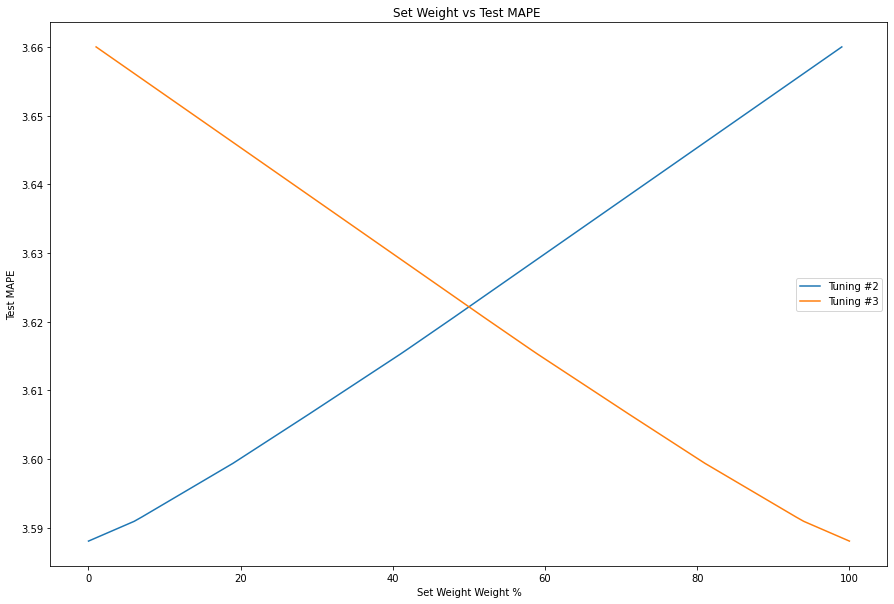

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(best_weight_x_arr*100, best_mape_arr, label = 'Tuning #2')
plt.plot(best_weight_y_arr*100, best_mape_arr, label = 'Tuning #3')
plt.xlabel('Set Weight Weight %')
plt.ylabel('Test MAPE')
plt.title('Set Weight vs Test MAPE ')
plt.legend()

### Tuning 5 (Lowering Iterations)

In [ ]:
cv = RepeatedKFold(n_splits = 3, random_state = 42, n_repeats=2)
model = CatBoostRegressor(logging_level='Silent', loss_function='MAPE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

eval_pool = Pool(X_test, y_test)

fit_params = {'eval_set' : eval_pool,
              'early_stopping_rounds' : 10
             }


search = GridSearchCV(model, grid, scoring='neg_mean_absolute_percentage_error', cv=cv, verbose=3)

In [ ]:
tuning_five = search.fit(X_train, y_train, **fit_params)

In [ ]:
tuning_five.best_params_

{'depth': 4, 'iterations': 150, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [ ]:
tuning_five = CatBoostRegressor(depth=4, iterations=150, l2_leaf_reg=3, learning_rate=0.1)
tuning_five.fit(X_train, y_train)

In [ ]:
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, tuning_five.predict(X_test))*100} %')

Test MAPE: 3.6390884913656665 %


### Tuning 6 (3 and 5)

In [ ]:
preds_x = tuning_three.predict(X_test)
preds_y = tuning_five.predict(X_test)

best_weight_x_arr = np.arange(0.0, 1, 0.01)
best_weight_y_arr = np.arange(1, 0.0, -0.01)
best_mape_arr = []

best_weight_x = 0
best_mape_six = 100

for j in np.arange(0.0, 1, 0.01):
  weight_x = j
  weight_y = 1-weight_x

  final_preds = []

  for i in range(len(X_test)):
    pred = (weight_x*preds_x[i]) + (weight_y*preds_y[i])
    final_preds.append(pred)

  mape = mean_absolute_percentage_error(y_test, final_preds)*100
  best_mape_arr.append(mape)
  if (mape < best_mape_six):
    best_mape_six = mape
    best_weight_x = weight_x


print(f'Best Weight One: {best_weight_x}, Best Weight Two: {1-best_weight_x}')
print(f'Best MAPE: {best_mape_six}')
#print(f'Combined MAPE: {mean_absolute_percentage_error(y_test, final_preds)*100} %')


print(f'Tuning 3 MAPE: {mean_absolute_percentage_error(y_test, tuning_three.predict(X_test))*100} %')
print(f'Tuning 5 MAPE: {mean_absolute_percentage_error(y_test, tuning_five.predict(X_test))*100} %')
#print(f'Combined MAPE: {mean_absolute_percentage_error(y_test, final_preds)*100} %')

Best Weight One: 0.79, Best Weight Two: 0.20999999999999996
Best MAPE: 3.5859942359930006
Tuning 3 MAPE: 3.5880382076856203 %
Tuning 5 MAPE: 3.6390884913656665 %


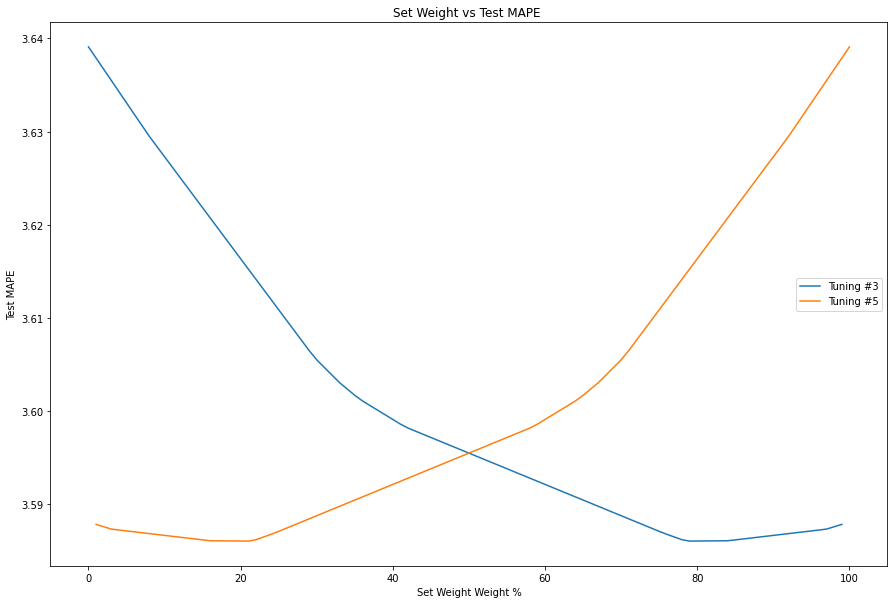

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(best_weight_x_arr*100, best_mape_arr, label = 'Tuning #3')
plt.plot(best_weight_y_arr*100, best_mape_arr, label = 'Tuning #5')
plt.xlabel('Set Weight Weight %')
plt.ylabel('Test MAPE')
plt.title('Set Weight vs Test MAPE ')
plt.legend()

### Results

In [ ]:
models_list = {'Tuning #': ['Untuned', 'Tuning #1', 'Tuning #2', 'Tuning #3', 'Tuning #4', 'Tuning #5', 'Tuning #6']}

results = pd.DataFrame(data = models_list)

linreg = np.zeros(7)
results['Best MAPE'] = linreg.copy()

results.iat[0, 1] = mean_absolute_percentage_error(y_test, untuned.predict(X_test))*100
results.iat[1, 1] = mean_absolute_percentage_error(y_test, tuning_one.predict(X_test))*100
results.iat[2, 1] = mean_absolute_percentage_error(y_test, tuning_two.predict(X_test))*100
results.iat[3, 1] = mean_absolute_percentage_error(y_test, tuning_three.predict(X_test))*100
results.iat[4, 1] = best_mape_four
results.iat[5, 1] = mean_absolute_percentage_error(y_test, tuning_five.predict(X_test))*100
results.iat[6, 1] = best_mape_six


display(results)

,Tuning #,Best MAPE
0,Untuned,3.718238
1,Tuning #1,3.670794
2,Tuning #2,3.660775
3,Tuning #3,3.588038
4,Tuning #4,3.588038
5,Tuning #5,3.639088
6,Tuning #6,3.585994


## Evaluation

### Final Predictions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(onethirty_features.drop(columns=['Log Value', 'Player']), onethirty_features['Log Value'], random_state=42, test_size=0.1)

In [ ]:
tuning_three = CatBoostRegressor(depth=5, iterations=1250,  learning_rate = 0.032)
tuning_three.fit(X_train, y_train)

In [ ]:
tuning_five = CatBoostRegressor(depth=4, iterations=150, l2_leaf_reg=3, learning_rate=0.1)
tuning_five.fit(X_train, y_train)

In [ ]:
preds_x_train = tuning_three.predict(X_train)
preds_y_train = tuning_five.predict(X_train)

final_preds_train = preds_x_train * 0.79 + preds_y_train * 0.21


preds_x_test = tuning_three.predict(X_test)
preds_y_test = tuning_five.predict(X_test)

final_preds_test = preds_x_test * 0.79 + preds_y_test * 0.21

In [ ]:
mean_absolute_percentage_error(y_test, final_preds_test)*100

3.585994235993

In [ ]:
preds_test = np.e ** final_preds_test
actual = np.e ** y_test

In [ ]:
name_train, name_test, y_train, y_test = train_test_split(onethirty_features['Player'], onethirty_features['Log Value'], random_state=42, test_size=0.1)

In [ ]:
results = pd.DataFrame(name_test)
results['Predicted Value'] = preds_test
results['Actual Value'] = actual
results['Error'] = abs(preds_test-actual)
results["Error %"] = abs(preds_test-actual)/actual * 100

In [ ]:
pd.options.display.float_format = '{:,}'.format
results.round(2)

,Player,Predicted Value,Actual Value,Error,Error %
365,Yussuf Poulsen,"8,119,197.63","18,000,000.0","9,880,802.37",54.89
344,Dean Henderson,"9,557,447.64","19,800,000.0","10,242,552.36",51.73
715,Gerard Pique,"6,211,690.94","9,000,000.0","2,788,309.06",30.98
70,Youri Tielemans,"12,348,136.65","49,500,000.0","37,151,863.35",75.05
846,Fabien Centonze,"8,982,067.88","6,300,000.0","2,682,067.88",42.57
1692,Artur Ionita,"650,821.17","630,000.0","20,821.17",3.3
1310,Danny Welbeck,"6,503,470.07","2,700,000.0","3,803,470.07",140.87
29,Raphael Varane,"26,665,516.2","63,000,000.0","36,334,483.8",57.67
1607,Finn Dahmen,"1,491,694.55","900,000.0","591,694.55",65.74
1531,Alexandre Oukidja,"1,897,113.16","1,350,000.0","547,113.16",40.53


In [ ]:
results = results.sort_values(by=['Error %'])
results = results.round(2)
results

,Player,Predicted Value,Actual Value,Error,Error %
1440,Michael Gregoritsch,"1,803,442.08","1,800,000.0","3,442.08",0.19
1013,Danny Ward,"4,491,183.98","4,500,000.0","8,816.02",0.2
570,Conor Gallagher,"11,774,980.49","11,700,000.0","74,980.49",0.64
1053,Boubakar Kouyate,"4,534,744.93","4,500,000.0","34,744.93",0.77
439,Emile Smith-Rowe,"15,911,893.68","16,200,000.0","288,106.32",1.78
631,Fran Beltran,"11,049,597.16","10,800,000.0","249,597.16",2.31
513,Eddie Nketiah,"13,863,461.65","13,500,000.0","363,461.65",2.69
1692,Artur Ionita,"650,821.17","630,000.0","20,821.17",3.3
984,Junior Sambia,"5,581,275.07","5,400,000.0","181,275.07",3.36
1235,William,"3,037,090.54","3,150,000.0","112,909.46",3.58


In [ ]:
results.head(5).append(results.tail(5))

,Player,Predicted Value,Actual Value,Error,Error %
1440,Michael Gregoritsch,"1,803,442.08","1,800,000.0","3,442.08",0.19
1013,Danny Ward,"4,491,183.98","4,500,000.0","8,816.02",0.2
570,Conor Gallagher,"11,774,980.49","11,700,000.0","74,980.49",0.64
1053,Boubakar Kouyate,"4,534,744.93","4,500,000.0","34,744.93",0.77
439,Emile Smith-Rowe,"15,911,893.68","16,200,000.0","288,106.32",1.78
1609,Diego Falcinelli,"3,233,421.33","900,000.0","2,333,421.33",259.27
1604,Stefan Bell,"3,417,662.33","900,000.0","2,517,662.33",279.74
1669,Lebo Mothiba,"3,531,404.34","720,000.0","2,811,404.34",390.47
1684,Nikola Vukcevic,"3,581,029.3","720,000.0","2,861,029.3",397.37
1556,Kevin N'Doram,"6,825,819.58","1,350,000.0","5,475,819.58",405.62


### Feature Importance Evaluation

In [ ]:
importance_three = tuning_three.get_feature_importance()
importance_five = tuning_five.get_feature_importance()

cols = onethirty_features.drop(columns=['Player', 'Log Value']).columns

In [ ]:
feature_importance = pd.DataFrame(cols, columns=['Feature'])
feature_importance['Importance %'] = importance_three * 0.79 + importance_five * 0.21
feature_importance

,Feature,Importance %
0,Age,18.22729555652877
1,MP (20/21),1.4220844890605002
2,Starts (20/21),0.3747165031798801
3,Min (20/21),0.39471493455548357
4,Total Mins/90 (20/21),0.29027825869542334
5,Gls (20/21),0.11990503014896839
6,Ast (20/21),0.03833622727153655
7,Non-Penalty Goals (20/21),0.03462722965666088
8,Penalties Scored (20/21),0.009553183368709906
9,Penalties Attempted (20/21),0.06529840600851276


In [ ]:
feature_importance = feature_importance.sort_values(by=['Importance %'], ascending=False)
feature_importance = feature_importance.round(2)
feature_importance

,Feature,Importance %
0,Age,18.23
72,Number of Times Player was Pass Target (20/21),6.84
126,League_Premier League,5.73
77,Pass Completion % (All pass-types) (20/21),4.61
67,Total Carries in Forward Direction (20/21),3.14
57,Touches in Attacking Penalty Box (20/21),2.57
125,League_Ligue 1,1.95
88,Pass Completion % (Long Passes) (20/21),1.86
13,(G+A)/90 (20/21),1.59
85,Pass Completion % (Medium Passes) (20/21),1.58


In [ ]:
feature_importance.head(5).append(feature_importance.tail(5))

,Feature,Importance %
0,Age,18.23
72,Number of Times Player was Pass Target (20/21),6.84
126,League_Premier League,5.73
77,Pass Completion % (All pass-types) (20/21),4.61
67,Total Carries in Forward Direction (20/21),3.14
124,League_Bundesliga,0.02
49,Shots Leading to Goals (20/21),0.02
8,Penalties Scored (20/21),0.01
51,Defensive Actions Leading to Goals (20/21),0.0
41,Shots Leading to Shot Attempt (20/21),0.0
